In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [20]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

In [21]:
#import dataframe
station = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [22]:
station.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [23]:
#import answers dataframe
picnic = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [24]:
#drop columns in dataframe that are not in the pleasant weather dataframes
dfmatch= station.drop(['MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean', 'GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max' ], axis = 1)

In [7]:
#reduce to just mean temperatures
dfmean = dfmatch[['DATE','BASEL_temp_mean',
           'BELGRADE_temp_mean',
           'BUDAPEST_temp_mean',
           'DEBILT_temp_mean',
           'DUSSELDORF_temp_mean',
           'HEATHROW_temp_mean',
           'KASSEL_temp_mean',
           'LJUBLJANA_temp_mean',
           'MAASTRICHT_temp_mean',
           'MADRID_temp_mean',
           'MUNCHENB_temp_mean',
           'OSLO_temp_mean',
           'SONNBLICK_temp_mean',
           'STOCKHOLM_temp_mean',
           'VALENTIA_temp_mean'
          ]].copy()

In [25]:
#Create an 'X' and a 'y' matrices by dropping the unneeded columns.
X = dfmatch.drop(['DATE'], axis=1)
y = picnic.drop(['DATE'], axis=1)

In [26]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [27]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [33]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc)

NameError: name 'StandardScaler' is not defined

[Text(0.36761729022295814, 0.9807692307692307, 'x[49] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06397399820427516, 0.9423076923076923, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018158565794635668, 0.9038461538461539, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.007991394974293324, 0.8653846153846154, 'x[78] <= 17.85\ngini = 0.0

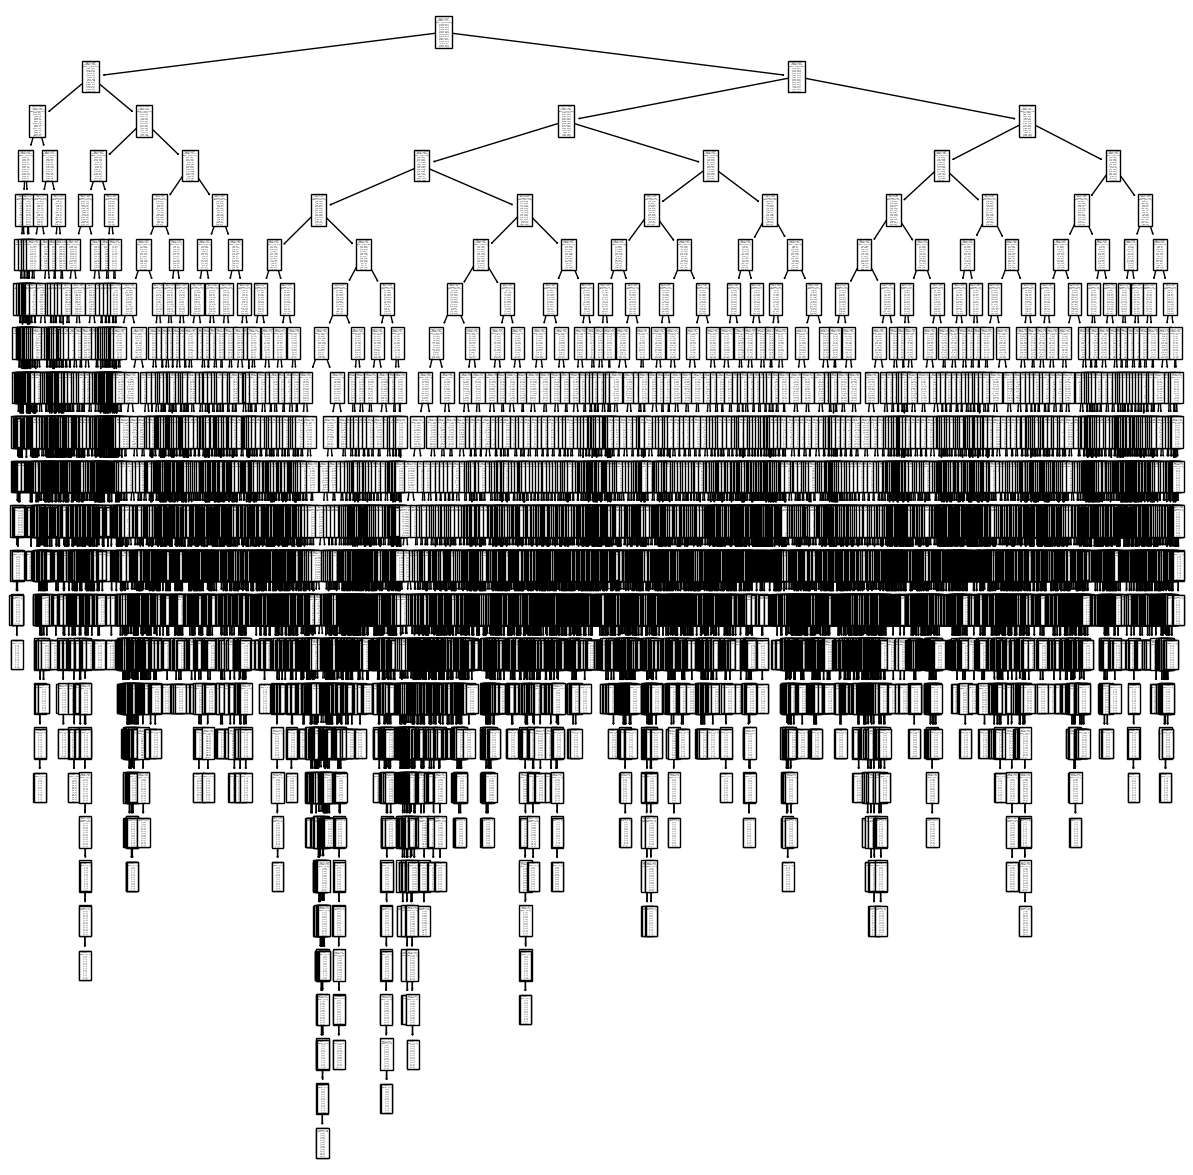

In [29]:
#Run Decision Tree classifier
station_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
station_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(station_dt)

In [30]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = station_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(station_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6038229014455502


InvalidIndexError: (slice(None, None, None), 0)

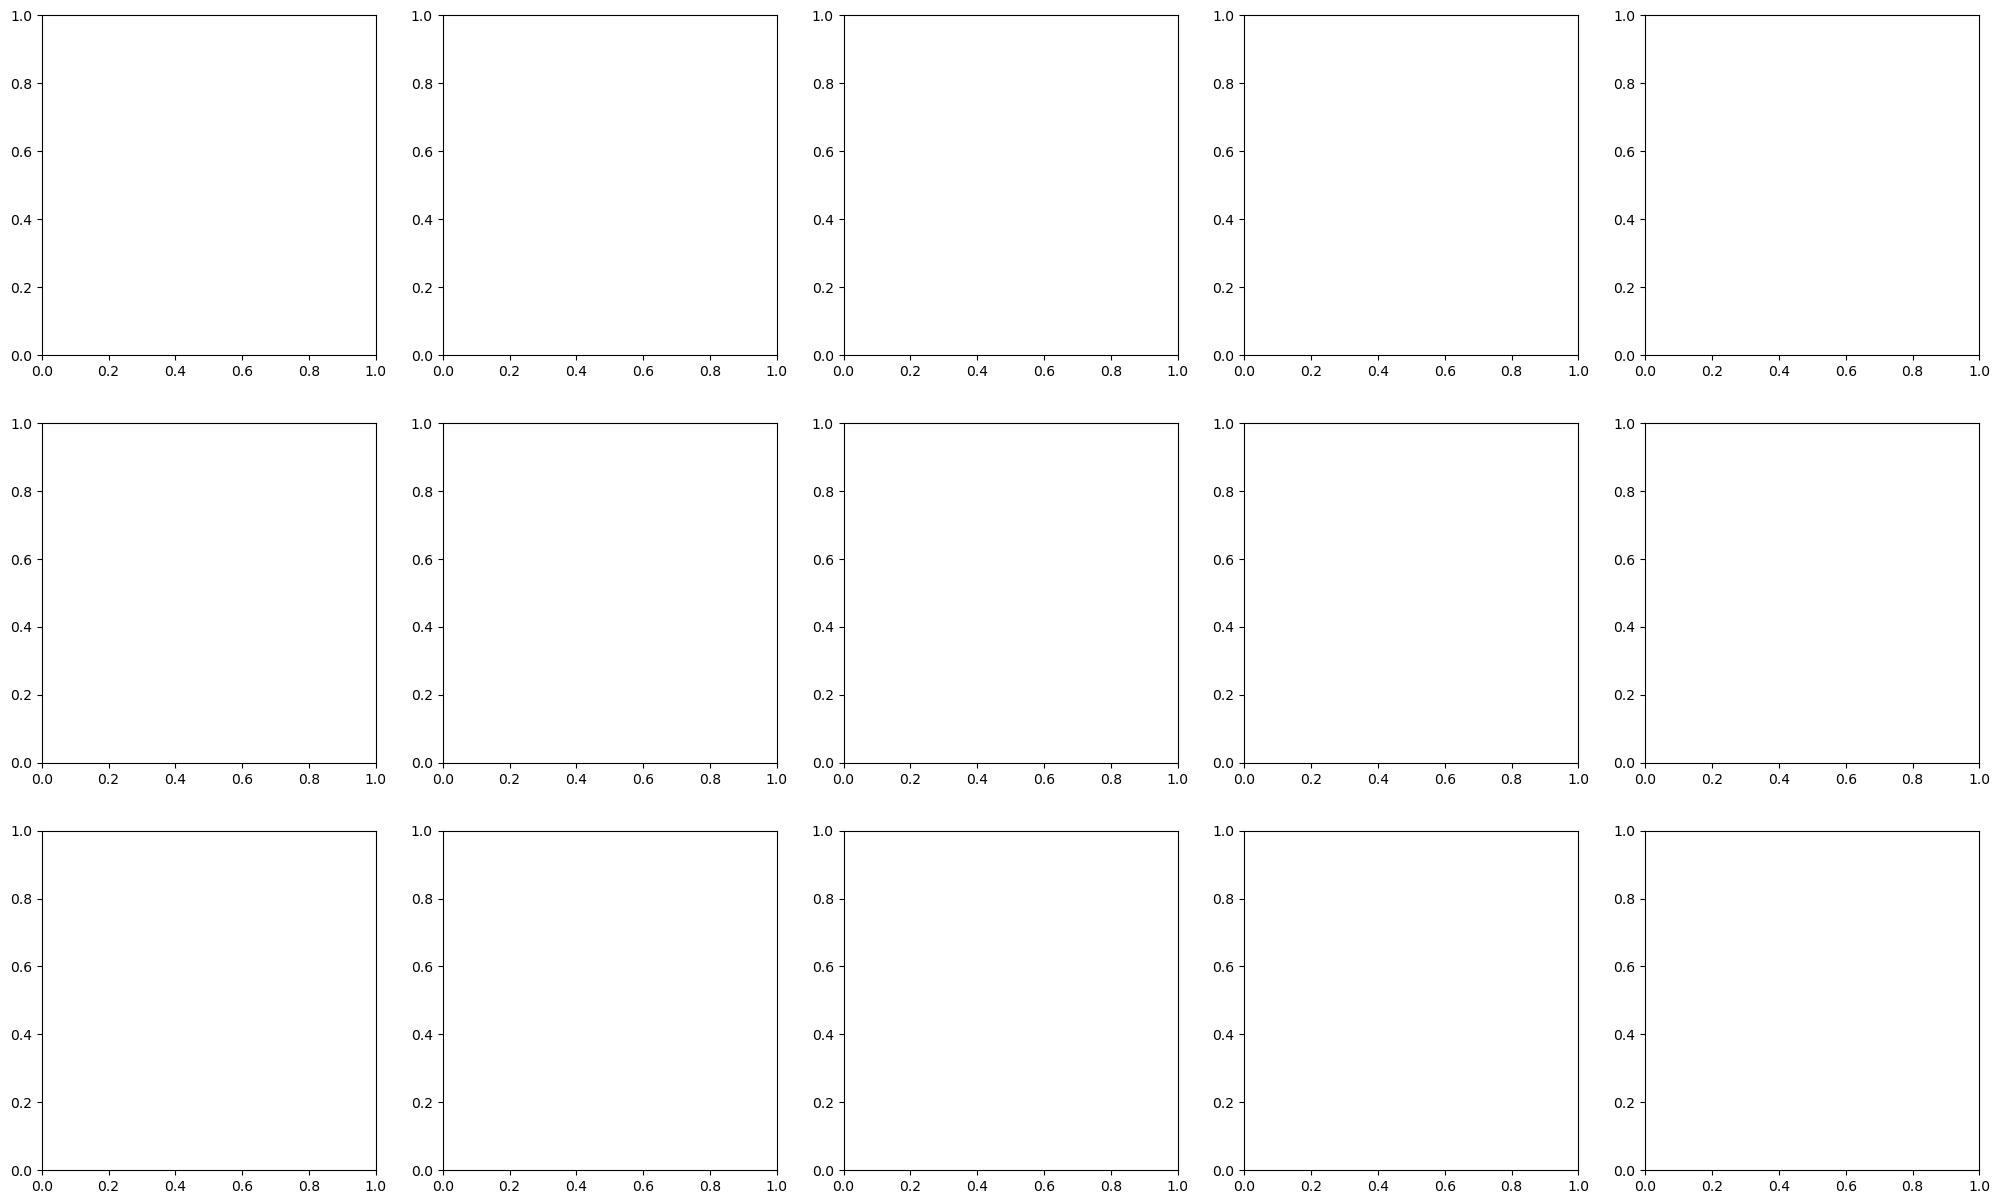

In [32]:
locations = list({x.split("_")[0] for x in dfmatch.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap (cm/np.sum(cm), annot=True, fmt='.2%', ax=ax[i,j]);
                # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        

In [22]:
#What is the testing accuracy score? Using the cross validation method
y_pred = station_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.40676193795747645


array([[[3744,  594],
        [ 570,  830]],

       [[3140,  636],
        [ 622, 1340]],

       [[3326,  574],
        [ 606, 1232]],

       [[4149,  488],
        [ 477,  624]],

       [[3971,  536],
        [ 532,  699]],

       [[3927,  643],
        [ 552,  616]],

       [[4391,  424],
        [ 408,  515]],

       [[3556,  639],
        [ 556,  987]],

       [[4048,  514],
        [ 487,  689]],

       [[2707,  461],
        [ 533, 2037]],

       [[4031,  515],
        [ 519,  673]],

       [[4464,  415],
        [ 379,  480]],

       [[5738,    0],
        [   0,    0]],

       [[4374,  392],
        [ 362,  610]],

       [[5274,  188],
        [ 206,   70]]], dtype=int64)